In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1. Data Overview**

We start by loading the data and taking a general look at it.

In [2]:
df = pd.read_csv('jumia_led_tvs_all_pages.csv')

In [3]:
df.head()

,Product Name,Price,Old Price,Discount,Rating,Reviews
0,"Amtec 32R1S, 32"" Inch Smart Android TV 1GB DDR...","KSh 11,599","KSh 19,000",39%,3.9,3.9 out of 5(103)
1,"Vitron HTC3246 - 32"" HD LED Digital TV - Black...","KSh 10,928","KSh 13,599",20%,3.9,3.9 out of 5(104)
2,"Vitron HTC3200S,32 Inch Frameless Smart Androi...","KSh 13,995","KSh 18,500",24%,4.6,4.6 out of 5(8)
3,"Amtec 32R1S,32” Inch Bluetooth Smart TV 1GB DD...","KSh 13,695","KSh 18,500",26%,5.0,5 out of 5(1)
4,Vitron AC/DC LED DIGITAL TV With Inbuilt Decor...,"KSh 7,946","KSh 8,489",6%,4.2,4.2 out of 5(20)


In [4]:
df.shape

(40, 6)

In [6]:
# Convert Price and Old Price columns to numeric values (removing 'KSh' and ',')
df['Price'] = df['Price'].replace({'KSh ': '', ',': ''}, regex=True).astype(float)
df['Old Price'] = df['Old Price'].replace({'KSh ': '', ',': ''}, regex=True).astype(float)

# Convert Discount to numeric by removing the '%' sign
df['Discount'] = df['Discount'].replace({'%': ''}, regex=True).astype(float)

In [7]:
# Overview of the DataFrame
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product Name  40 non-null     object 
 1   Price         40 non-null     float64
 2   Old Price     40 non-null     float64
 3   Discount      40 non-null     float64
 4   Rating        31 non-null     float64
 5   Reviews       31 non-null     object 
dtypes: float64(4), object(2)
memory usage: 2.0+ KB
None
              Price     Old Price  Discount     Rating
count     40.000000     40.000000  40.00000  31.000000
mean   10935.475000  15315.075000  27.72500   4.219355
std     3744.296695   5590.660795   7.78884   0.734130
min      799.000000    999.000000   6.00000   2.300000
25%     9620.500000  12500.000000  23.00000   3.900000
50%    12295.000000  17250.000000  26.00000   4.400000
75%    12999.000000  19250.000000  32.25000   4.900000
max    16995.000000  25000.000000  46.00000   5.000000


In [8]:
df.head()

,Product Name,Price,Old Price,Discount,Rating,Reviews
0,"Amtec 32R1S, 32"" Inch Smart Android TV 1GB DDR...",11599.0,19000.0,39.0,3.9,3.9 out of 5(103)
1,"Vitron HTC3246 - 32"" HD LED Digital TV - Black...",10928.0,13599.0,20.0,3.9,3.9 out of 5(104)
2,"Vitron HTC3200S,32 Inch Frameless Smart Androi...",13995.0,18500.0,24.0,4.6,4.6 out of 5(8)
3,"Amtec 32R1S,32” Inch Bluetooth Smart TV 1GB DD...",13695.0,18500.0,26.0,5.0,5 out of 5(1)
4,Vitron AC/DC LED DIGITAL TV With Inbuilt Decor...,7946.0,8489.0,6.0,4.2,4.2 out of 5(20)


**2. Price Analysis**

We can analyze the price distribution, identify the most expensive and least expensive products, and explore any trends.

In [9]:
# Identify the most and least expensive products
most_expensive = df.loc[df['Price'].idxmax()]
least_expensive = df.loc[df['Price'].idxmin()]

print("Most Expensive Product:\n", most_expensive[['Product Name', 'Price']])
print("Least Expensive Product:\n", least_expensive[['Product Name', 'Price']])

# Basic statistics for prices
price_stats = df['Price'].describe()
print("Price Statistics:\n", price_stats)

Most Expensive Product:
 Product Name    Hisense 32" Inches Frameless Digital HD LED TV...
Price                                                     16995.0
Name: 35, dtype: object
Least Expensive Product:
 Product Name    Digital Smart TV Ariel With A 10M Free Coaxiab...
Price                                                       799.0
Name: 8, dtype: object
Price Statistics:
 count       40.000000
mean     10935.475000
std       3744.296695
min        799.000000
25%       9620.500000
50%      12295.000000
75%      12999.000000
max      16995.000000
Name: Price, dtype: float64


**3. Discount Analysis**

This part focuses on identifying the products with the highest discounts and how much savings a customer can get.

In [10]:
# Sort products by discount to find the highest and lowest discounts
df_sorted_by_discount = df.sort_values('Discount', ascending=False)

print("Products with the largest discounts:\n", df_sorted_by_discount[['Product Name', 'Discount', 'Old Price', 'Price']])

# Calculate savings from the discount
df['Savings'] = df['Old Price'] - df['Price']
print("Savings:\n", df[['Product Name', 'Old Price', 'Price', 'Savings']])

Products with the largest discounts:
                                          Product Name  Discount  Old Price  \
23  Home Design Tv Bracket For 14"-55" ROTATING An...      46.0     2430.0   
21  Iconix  32" INCHES AC/DC LED DIGITAL FRAMELESS...      42.0    22000.0   
0   Amtec 32R1S, 32" Inch Smart Android TV 1GB DDR...      39.0    19000.0   
11  Vitron HTC3218 32" Digital Television HD LED T...      39.0    20000.0   
33  Vitron HTC3218,32 Inches Frameless Digital LED...      39.0    20000.0   
36  Vitron HTC3218,32" Frameless Digital TV,HDMI/U...      38.0    20000.0   
31                Amtec 32” Digital LED HD TV - Black      35.0    20000.0   
18  Hisense 32A3KKEN,32"inch Digital HD LED TV Inb...      34.0    25000.0   
13  Vision Frameless VP8832DF,32" Inch Digital HD ...      34.0    20000.0   
37  CTC Digital Inbuilt Decorder -With USB & HDMI ...      33.0     9999.0   
25  CTC 26" INCHES DIGITAL LED TV- FREE TO AIR CHA...      32.0    17000.0   
34  Vitron HTC3200S,32 Inc

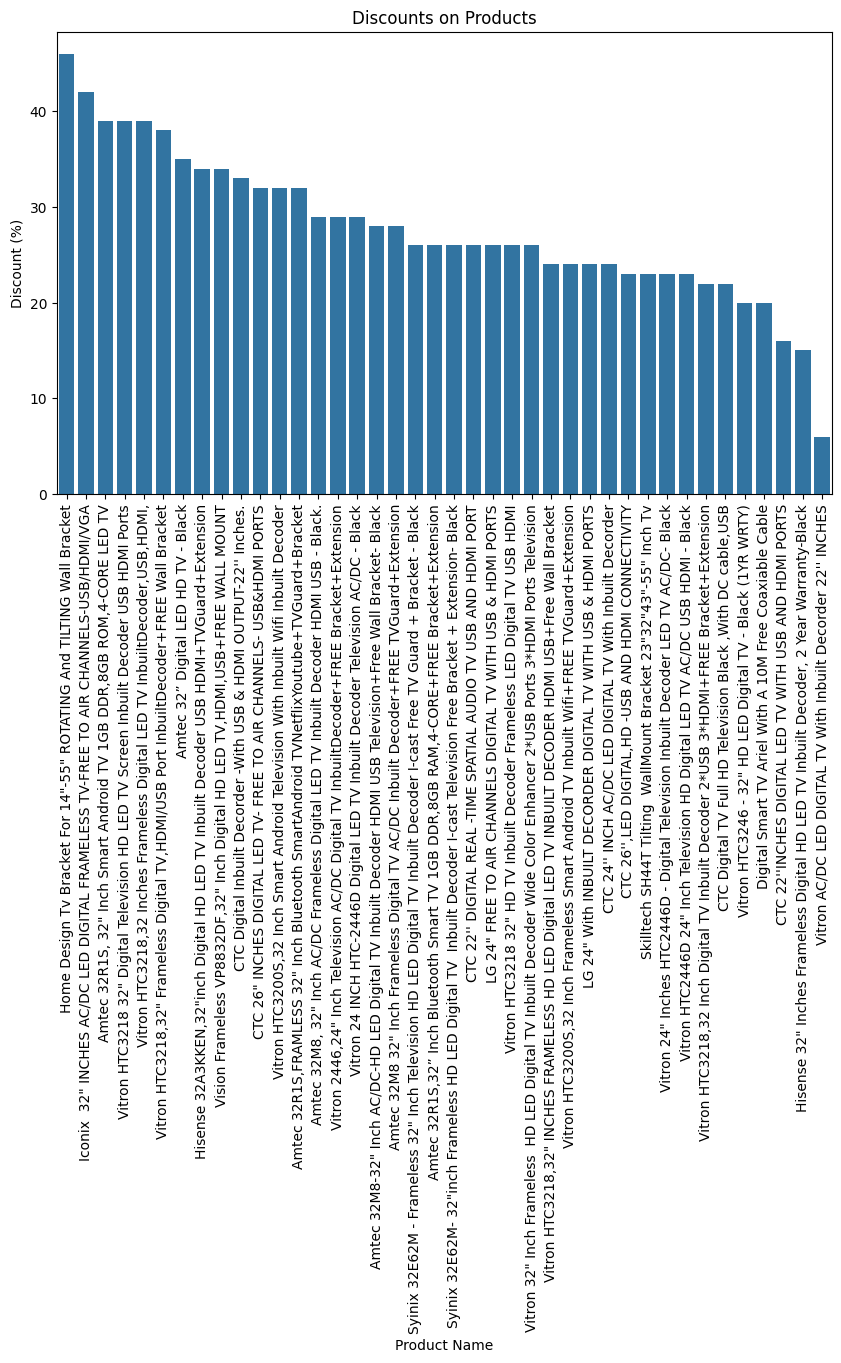

In [16]:
# Plot the discount percentages
plt.figure(figsize=(10, 6))
sns.barplot(x='Product Name', y='Discount', data=df_sorted_by_discount)
plt.xticks(rotation=90)
plt.title('Discounts on Products')
plt.ylabel('Discount (%)')
plt.show()

**4. Ratings and Reviews Analysis**

We can analyze product ratings to find top-rated products and check how many reviews they have.

In [18]:
# Extract the number of reviews from the 'Reviews' column
df['Num Reviews'] = df['Reviews'].str.extract(r'\((\d+)\)').astype(float)

# Replace NaN values with 0 and convert to integer
df['Num Reviews'] = df['Num Reviews'].fillna(0).astype(int)

# Now you can proceed with identifying the product with the most reviews
most_reviewed = df.loc[df['Num Reviews'].idxmax()]
print("Product with the most reviews:\n", most_reviewed[['Product Name', 'Num Reviews']])

Product with the most reviews:
 Product Name    Vitron HTC3246 - 32" HD LED Digital TV - Black...
Num Reviews                                                   104
Name: 1, dtype: object


**5. Product Deals Analysis**

This part brings together price, discount, and ratings to identify the best deals based on the price, discount percentage, and customer ratings.

In [22]:
# Sort products based on both discount and rating to identify good deals
df['Deal Score'] = df['Discount'] * df['Rating']  # A simple metric combining discount and rating
top_deals = df.sort_values('Deal Score', ascending=False)

print("Top Deals (Discount * Rating):\n", top_deals[['Product Name', 'Price', 'Discount', 'Rating', 'Deal Score']])

Top Deals (Discount * Rating):
                                          Product Name    Price  Discount  \
33  Vitron HTC3218,32 Inches Frameless Digital LED...  12295.0      39.0   
11  Vitron HTC3218 32" Digital Television HD LED T...  12295.0      39.0   
31                Amtec 32” Digital LED HD TV - Black  12999.0      35.0   
37  CTC Digital Inbuilt Decorder -With USB & HDMI ...   6697.0      33.0   
36  Vitron HTC3218,32" Frameless Digital TV,HDMI/U...  12495.0      38.0   
13  Vision Frameless VP8832DF,32" Inch Digital HD ...  13299.0      34.0   
18  Hisense 32A3KKEN,32"inch Digital HD LED TV Inb...  16595.0      34.0   
0   Amtec 32R1S, 32" Inch Smart Android TV 1GB DDR...  11599.0      39.0   
5   Amtec 32M8-32" Inch AC/DC-HD LED Digital TV In...  12595.0      28.0   
24  Vitron 32" Inch Frameless  HD LED Digital TV I...  12195.0      26.0   
3   Amtec 32R1S,32” Inch Bluetooth Smart TV 1GB DD...  13695.0      26.0   
34  Vitron HTC3200S,32 Inch Smart Android Televisi...  1

/tmp/ipykernel_14820/3788171937.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Price', y='Product Name', data=df, palette='Blues_d')


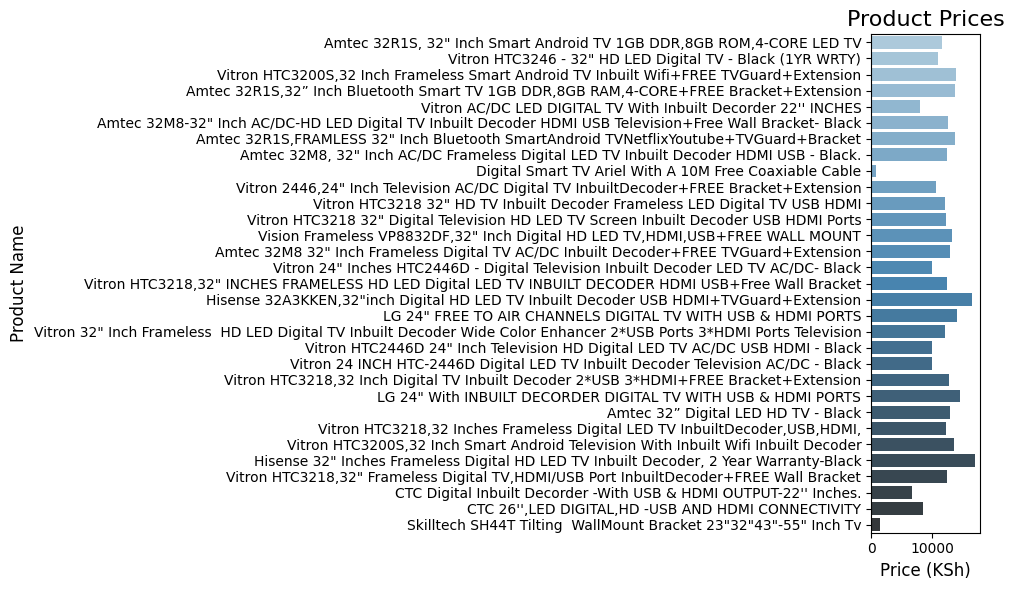

In [23]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for product prices
sns.barplot(x='Price', y='Product Name', data=df, palette='Blues_d')

# Add title and labels
plt.title('Product Prices', fontsize=16)
plt.xlabel('Price (KSh)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_14820/546899756.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Discount', y='Product Name', data=df, palette='Greens_d')


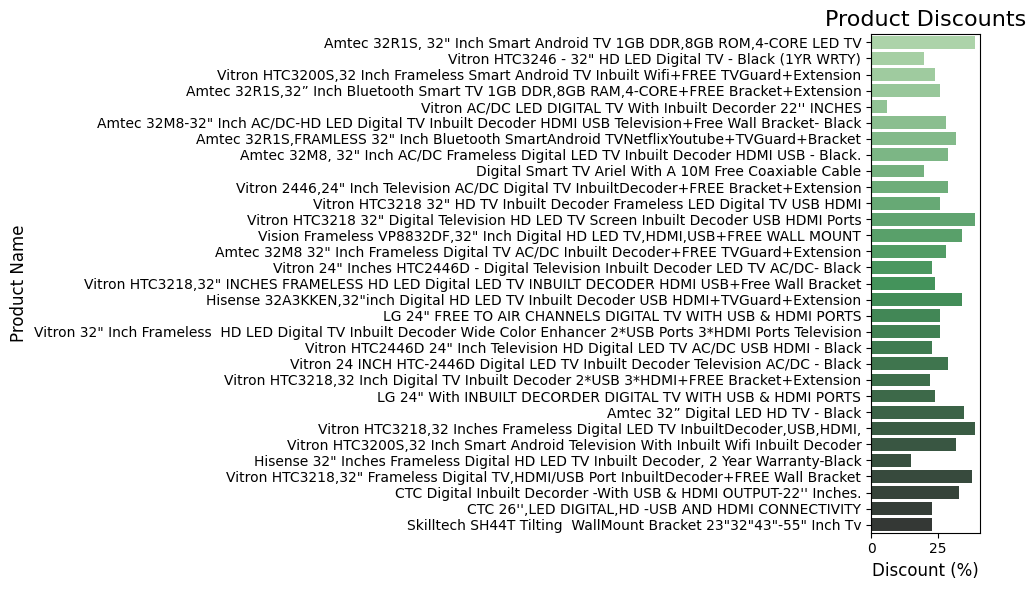

In [24]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for product discounts
sns.barplot(x='Discount', y='Product Name', data=df, palette='Greens_d')

# Add title and labels
plt.title('Product Discounts', fontsize=16)
plt.xlabel('Discount (%)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_14820/3820232425.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rating', y='Product Name', data=df, palette='Purples_d')


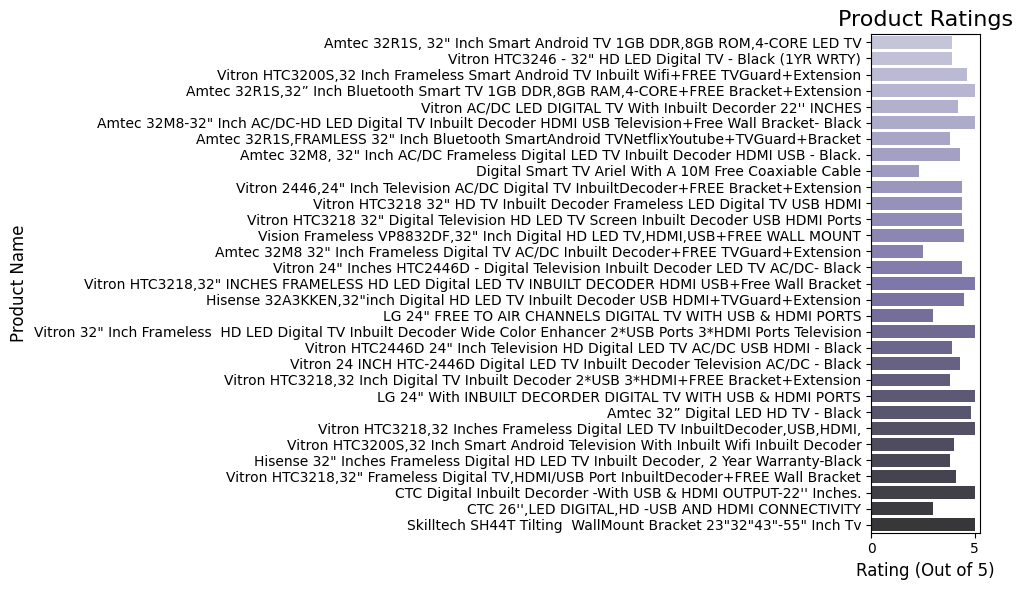

In [25]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for product ratings
sns.barplot(x='Rating', y='Product Name', data=df, palette='Purples_d')

# Add title and labels
plt.title('Product Ratings', fontsize=16)
plt.xlabel('Rating (Out of 5)', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_14820/1433243635.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Num Reviews', y='Product Name', data=df, palette='Reds_d')


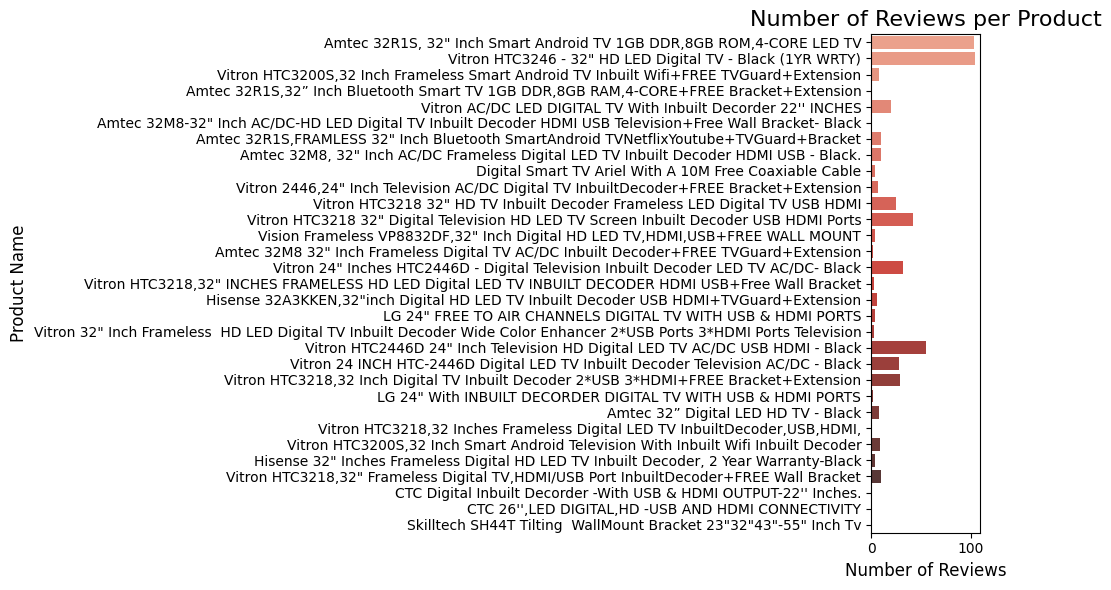

In [26]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a bar plot for number of reviews
sns.barplot(x='Num Reviews', y='Product Name', data=df, palette='Reds_d')

# Add title and labels
plt.title('Number of Reviews per Product', fontsize=16)
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Product Name', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

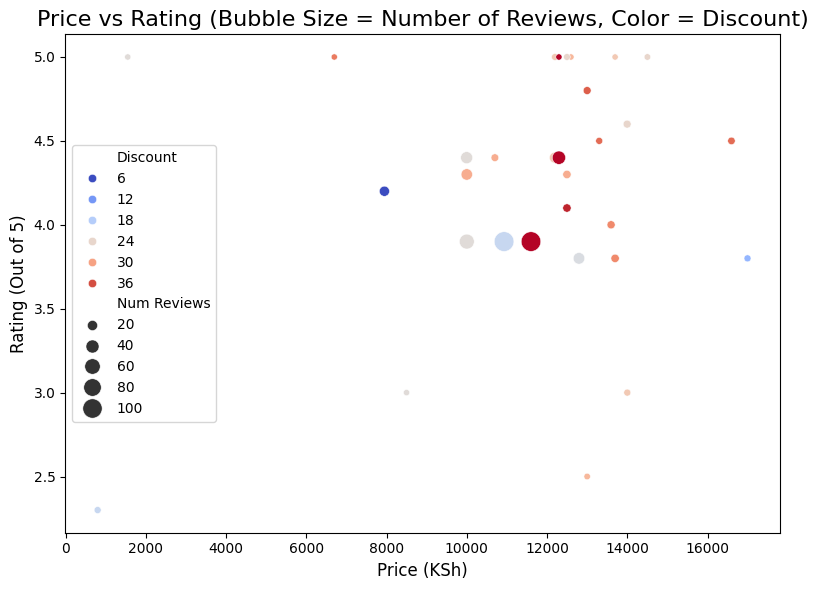

In [27]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a scatter plot for price vs rating
sns.scatterplot(x='Price', y='Rating', data=df, size='Num Reviews', hue='Discount', palette='coolwarm', sizes=(20, 200))

# Add title and labels
plt.title('Price vs Rating (Bubble Size = Number of Reviews, Color = Discount)', fontsize=16)
plt.xlabel('Price (KSh)', fontsize=12)
plt.ylabel('Rating (Out of 5)', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

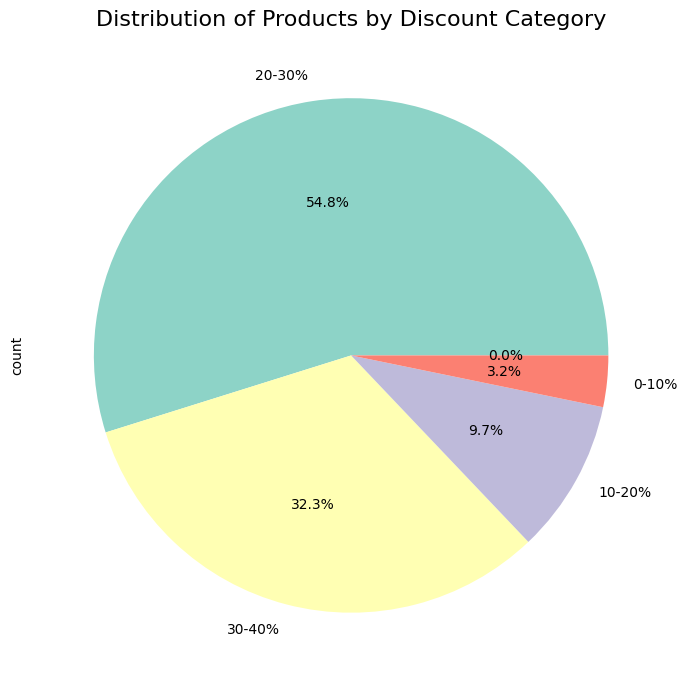

In [28]:
# Create categories based on discount percentages
df['Discount Category'] = pd.cut(df['Discount'], bins=[0, 10, 20, 30, 40, 50], labels=['0-10%', '10-20%', '20-30%', '30-40%', '40-50%'])

# Plot the pie chart
plt.figure(figsize=(7, 7))
df['Discount Category'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Set3', 5))

# Add title
plt.title('Distribution of Products by Discount Category', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()